<a href="https://colab.research.google.com/github/FooolyHARD/AI_Lab5/blob/main/AI_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = 'sample_data/diabetes.csv'
df = pd.read_csv(file_path)

print("Первые строки датасета:")
print(df.head())

df.replace({'Glucose': {0: np.nan},
            'BloodPressure': {0: np.nan},
            'SkinThickness': {0: np.nan},
            'Insulin': {0: np.nan},
            'BMI': {0: np.nan}
            }, inplace=True)

df.fillna(df.median(), inplace=True)

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df.drop('Outcome', axis=1)), columns=df.columns[:-1])
df_minmax_scaled['Outcome'] = df['Outcome']

print("Статистика по датасету (после MinMaxScaling):")
print(df_minmax_scaled.describe().transpose())



Первые строки датасета:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
Статистика по датасету (после MinMaxScaling):
               count      mean       std  min       25%       50%       75%  \
Pregnancies    768.0  0.226180  0.198210  0.0  0.058824  0.176471  0.352941   
Glucose        768.0  0.501008  0.196376  0.0  0.359677  0.470968  0.620968   
BloodPressure  768.0  0.493742  0.123435  0.0  0.408163  0.489796  0.571429   
SkinThickness

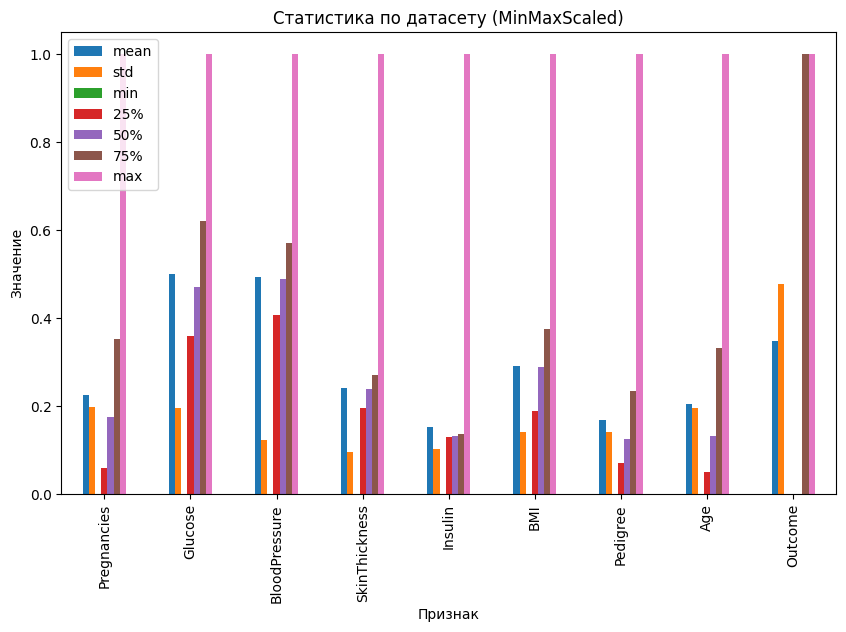

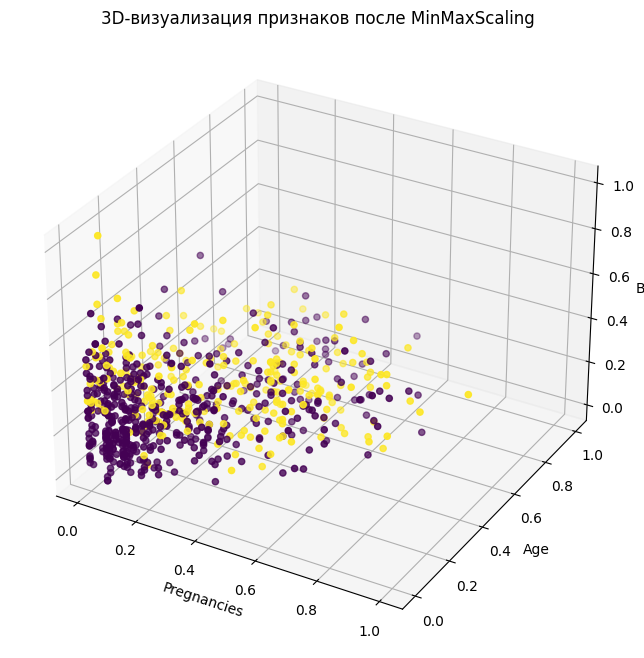

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(10, 6))
df_minmax_scaled.describe().transpose().drop('count', axis=1).plot(kind='bar', ax=ax)
ax.set_ylabel("Значение")
ax.set_xlabel("Признак")
ax.set_title("Статистика по датасету (MinMaxScaled)")
plt.show()

fig_3d_minmax = plt.figure(figsize=(10, 8))
ax_3d_minmax = fig_3d_minmax.add_subplot(111, projection='3d')

ax_3d_minmax.scatter(df_minmax_scaled['Pregnancies'], df_minmax_scaled['Age'], df_minmax_scaled['BMI'], c=df_minmax_scaled['Outcome'], marker='o', cmap='viridis')
ax_3d_minmax.set_xlabel('Pregnancies')
ax_3d_minmax.set_ylabel('Age')
ax_3d_minmax.set_zlabel('BMI')
ax_3d_minmax.set_title('3D-визуализация признаков после MinMaxScaling')

plt.show()



In [45]:
import numpy as np
import pandas as pd

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for i in range(len(X_test)):
            distances = np.sqrt(np.sum((self.X_train - X_test.iloc[i])**2, axis=1))
            nearest_neighbors = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train.iloc[nearest_neighbors]
            prediction = k_nearest_labels.mode().iloc[0]
            predictions.append(prediction)

        return np.array(predictions)

X_train_knn = df_minmax_scaled.drop('Outcome', axis=1)
y_train_knn = df_minmax_scaled['Outcome']

data_test_knn = {
    'Pregnancies': [0.2, 0.6, 0.8],
    'Glucose': [0.3, 0.7, 0.9],
    'BloodPressure': [0.4, 0.5, 0.6],
    'SkinThickness': [0.1, 0.3, 0.2],
    'Insulin': [0.2, 0.4, 0.6],
    'BMI': [0.5, 0.6, 0.7],
    'Pedigree': [0.2, 0.4, 0.3],
    'Age': [0.3, 0.5, 0.6]
}

df_test_knn = pd.DataFrame(data_test_knn)

knn_model = KNNClassifier(k=3)
knn_model.fit(X_train_knn, y_train_knn)

predictions_knn = knn_model.predict(df_test_knn)

print("Predictions:", predictions_knn)


Predictions: [1 1 1]


In [49]:
import random

class RandomFeatureKNNClassifier(KNNClassifier):
    def __init__(self, k=3, num_features=None):
        super().__init__(k)
        self.num_features = num_features

    def fit(self, X_train, y_train):
        if self.num_features is None:
            self.num_features = X_train.shape[1] // 2  # Выбираем случайно половину признаков
        selected_features = random.sample(list(X_train.columns), self.num_features)
        super().fit(X_train[selected_features], y_train)

class FixedFeatureKNNClassifier(KNNClassifier):
    def __init__(self, k=3, fixed_features=None):
        super().__init__(k)
        self.fixed_features = fixed_features

    def fit(self, X_train, y_train):
        if self.fixed_features is None:
            raise ValueError("Необходимо предоставить фиксированный набор признаков.")
        super().fit(X_train[self.fixed_features], y_train)

random_selected_features = random.sample(list(X_train_knn.columns), len(X_train_knn.columns) // 2)
fixed_selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']

random_feature_knn_model = RandomFeatureKNNClassifier(k=3, num_features=len(random_selected_features))
random_feature_knn_model.fit(X_train_knn, y_train_knn)

fixed_feature_knn_model = FixedFeatureKNNClassifier(k=3, fixed_features=fixed_selected_features)
fixed_feature_knn_model.fit(X_train_knn, y_train_knn)

predictions_random_feature_knn = random_feature_knn_model.predict(df_test_knn[random_selected_features])
predictions_fixed_feature_knn = fixed_feature_knn_model.predict(df_test_knn[fixed_selected_features])

print("Predictions for Random Feature Model:", predictions_random_feature_knn)
print("Predictions for Fixed Feature Model:", predictions_fixed_feature_knn)


Predictions for Random Feature Model: [0 0 1]
Predictions for Fixed Feature Model: [1 1 1]


Модель с случайно выбранными признаками:
K=3, Accuracy=0.6233766233766234
Confusion Matrix:


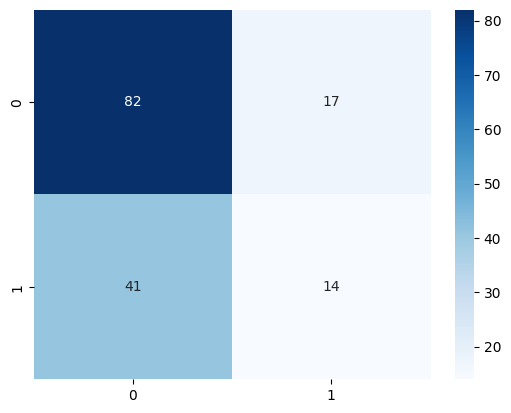


K=5, Accuracy=0.577922077922078
Confusion Matrix:


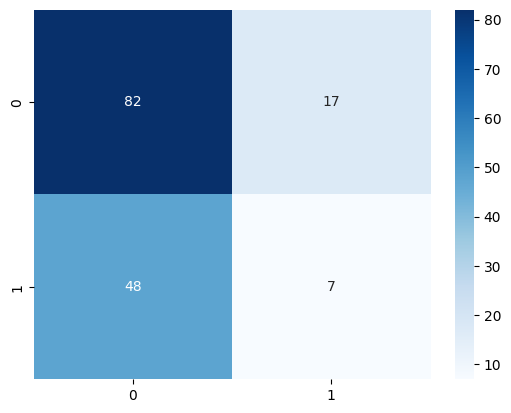


K=10, Accuracy=0.6168831168831169
Confusion Matrix:


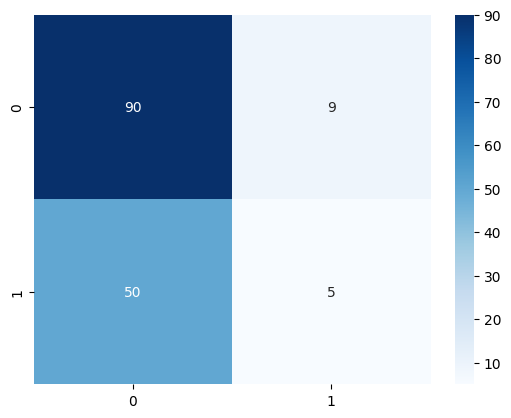



Модель с фиксированными признаками:
K=3, Accuracy=0.7337662337662337
Confusion Matrix:


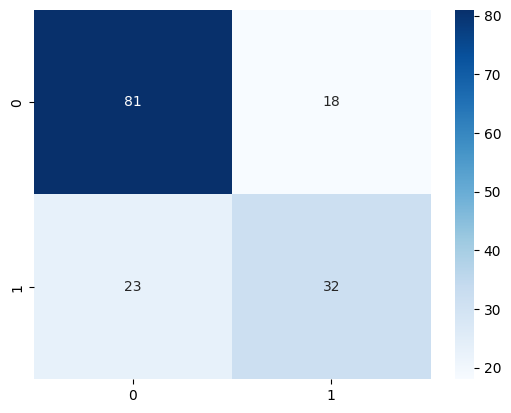


K=5, Accuracy=0.7662337662337663
Confusion Matrix:


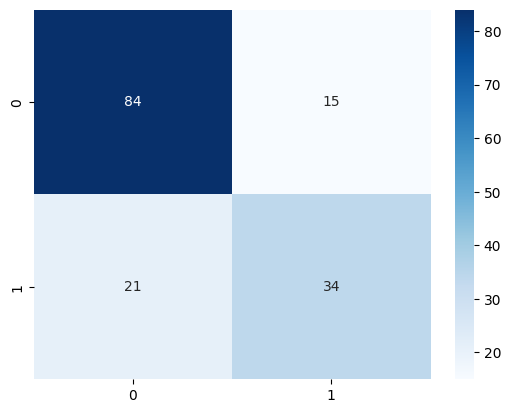


K=10, Accuracy=0.7597402597402597
Confusion Matrix:


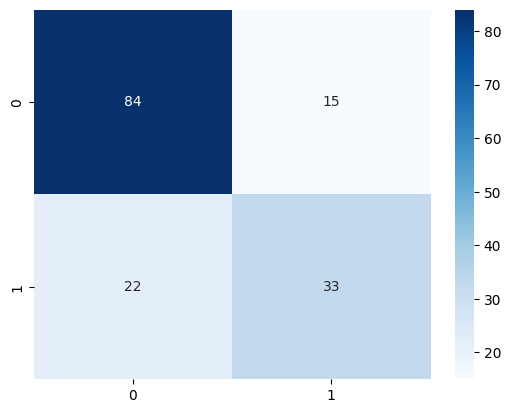

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

def evaluate_model(model, X_test, y_test, k_values):
    accuracy_scores = []
    confusion_matrices = []

    for k in k_values:
        model.k = k
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        confusion_matrix_result = confusion_matrix(y_test, predictions)

        accuracy_scores.append(accuracy)
        confusion_matrices.append(confusion_matrix_result)

    return accuracy_scores, confusion_matrices

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train_knn, y_train_knn, test_size=0.2, random_state=42)

random_feature_knn_model = RandomFeatureKNNClassifier(k=3)
random_feature_knn_model.fit(X_train_knn, y_train_knn)

fixed_feature_knn_model = FixedFeatureKNNClassifier(k=3, fixed_features=fixed_selected_features)
fixed_feature_knn_model.fit(X_train_knn, y_train_knn)

k_values = [3, 5, 10]

accuracy_scores_random_feature, confusion_matrices_random_feature = evaluate_model(random_feature_knn_model, X_test_knn[random_selected_features], y_test_knn, k_values)

accuracy_scores_fixed_feature, confusion_matrices_fixed_feature = evaluate_model(fixed_feature_knn_model, X_test_knn[fixed_selected_features], y_test_knn, k_values)

print("Модель с случайно выбранными признаками:")
for k, accuracy, confusion_matrix_result in zip(k_values, accuracy_scores_random_feature, confusion_matrices_random_feature):
    print(f"K={k}, Accuracy={accuracy}")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
    plt.show()
    print()

print("\nМодель с фиксированными признаками:")
for k, accuracy, confusion_matrix_result in zip(k_values, accuracy_scores_fixed_feature, confusion_matrices_fixed_feature):
    print(f"K={k}, Accuracy={accuracy}")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
    plt.show()
    print()
